In [ ]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import re
import os
pd.__version__


'1.1.5'

In [ ]:
#Mouting the drive to load a simple dataset stored on the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# # Extract data set from tar file
# import  tarfile
# tarDataSet = tarfile.open("/content/gdrive/MyDrive/Colab Notebooks/Project/yelp_dataset.tar")
# tarDataSet.getmembers()

# # extracting file
# tarDataSet.extractall('/content/gdrive/MyDrive/Colab Notebooks/Project/yelp_dataset')
# tarDataSet.close()

In [ ]:
# Read dataset file and load into pyton data object 
reviewDF = pd.read_json('/content/gdrive/MyDrive/Colab Notebooks/Project/yelp_dataset/review_data_split/Review_DataSet.json', lines = True)
# check the No of records and columns
reviewDF.shape

(50000, 9)

In [ ]:
# see the initial data of dataset
reviewDF.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01


In [ ]:
# Labaling of stars: 1 for possitve review nad 0 for negative review 
def Star_lable(x):
  if x > 3:
    return 1
  else:
    return 0
# Assign the stars columns to the dataset 
reviewDF['stars'] = reviewDF['stars'].apply(Star_lable)
# See the new values of stars columns
reviewDF.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,1,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,1,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,1,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,0,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,1,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


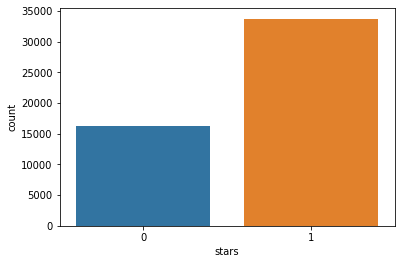

In [ ]:
# ploating of stars anylysis as 1 or 0 
# graph useing seaborn liabrary 
sns.countplot(reviewDF.stars)

In [ ]:
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# Downlading the functions of NLTK 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# list for stopwords of nltk
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# method for pre prossesing review (cleaning text for sentiment analysis)
def review_cleaning(review):
  # removing the speacial characters from review text using regular expresstion
  clean_review = re.sub('[^1-9a-zA-Z]',' ',str(review))
  # text to lower case
  clean_review = clean_review.lower()
  # array for review text
  clean_review = clean_review.split()
  # removing the stopwords form array of review text
  clean_review = [WordNetLemmatizer().lemmatize(word, pos='v') for word in clean_review if word not in stopwords_list]
  # converting words to the original form by removing s,es,ing,ed
  clean_review = [WordNetLemmatizer().lemmatize(word, pos=('a')) for word in clean_review]
  # convert arry to text for prossesing
  clean_review = ' '.join(clean_review)

  return clean_review

# assign a new column for cleaned data
reviewDF['clean_review'] = reviewDF['text'].apply(lambda x : review_cleaning(x))
# print the last 5 records from dataset
reviewDF[:5]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,clean_review
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,1,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02,apparently pride osteria rough summer evidence...
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,1,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25,store pretty good great walmart prefer milford...
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,1,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06,call wvm recommendation couple friends use pas...
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,0,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15,stay many marriott renaissance marriott huge d...
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,1,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01,food always great service manager well staff s...


In [ ]:
### Classification for sentiment analysis 
### I used 3 classification methods for classification
### Navie base Classification , SGD Classification , Logistic Regression classification
# Importing libaries for Classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# Navie base classification pipeline
navieBase = Pipeline([('vectorize', CountVectorizer(ngram_range=(1, 2))),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

# SGD Classification pipline
sgdClassifier = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier()),
               ])

# Logistic Regression classification pipline
logistingRegrestion = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(max_iter = 500)),
               ])

In [ ]:
# Pre paring traing and testing dataset 
review = reviewDF['clean_review']
star = reviewDF.stars
# split dataset into the traing and testing using "train_test_split"
review_train, review_test, star_train, star_test = train_test_split(review, star, test_size=0.2, stratify=star, random_state = 44)

In [ ]:
# Naive Bayes
navieBase.fit(review_train, star_train)
star_pred_nb = navieBase.predict(review_test)
print("Naive Bayes Classification")
print("Accuracy: ")
print(accuracy_score(star_test, star_pred_nb))
print("confusion matrix is : ")
print(confusion_matrix(star_test, star_pred_nb))
print("Classification report is  " )
print(classification_report(star_test, star_pred_nb))

# SGD Classifier
sgdClassifier.fit(review_train, star_train)
star_pred_sgd = sgdClassifier.predict(review_test)
print("SGD Classifier")
print("Accuracy: ")
print(accuracy_score(star_test, star_pred_sgd))
print("confusion matrix is : ")
print(confusion_matrix(star_test, star_pred_sgd))
print("Classification report is  " )
print(classification_report(star_test, star_pred_sgd))

# Logistic Regression
logistingRegrestion.fit(review_train, star_train)
star_pred_logReg = logistingRegrestion.predict(review_test)
print("Logistic Regression")
print("Accuracy: ")
print(accuracy_score(star_test, star_pred_logReg))
print("confusion matrix is : ")
print( confusion_matrix(star_test, star_pred_logReg))
print("Classification report is  " )
print(classification_report(star_test, star_pred_logReg))

Naive Bayes Classification
Accuracy: 
0.6992
confusion matrix is : 
[[ 239 3007]
 [   1 6753]]
Classification report is  
              precision    recall  f1-score   support

           0       1.00      0.07      0.14      3246
           1       0.69      1.00      0.82      6754

    accuracy                           0.70     10000
   macro avg       0.84      0.54      0.48     10000
weighted avg       0.79      0.70      0.60     10000

SGD Classifier
Accuracy: 
0.8806
confusion matrix is : 
[[2317  929]
 [ 265 6489]]
Classification report is  
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      3246
           1       0.87      0.96      0.92      6754

    accuracy                           0.88     10000
   macro avg       0.89      0.84      0.86     10000
weighted avg       0.88      0.88      0.88     10000

Logistic Regression
Accuracy: 
0.8824
confusion matrix is : 
[[2393  853]
 [ 323 6431]]
Classification report is  

https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

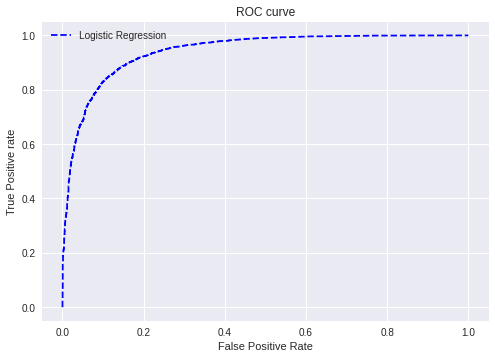

In [ ]:
from sklearn.metrics import roc_curve
# model for ROC curve predictions
modelROC = logistingRegrestion.predict_proba(review_test)
# roc curve for models
fpr, tpr, thresh = roc_curve(star_test, modelROC[:,1], pos_label=1)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='blue', label='Logistic Regression')
# title of graph 
plt.title('ROC curve')
# label for x axix
plt.xlabel('False Positive Rate')
# label for y axix
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
## wordcloud Graph image ploting
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# method for image graph
def prepare_wordcloud(words, title = None):
    wordcloudImage = WordCloud(
        background_color = 'black',
        max_words = 300,
        max_font_size = 50, 
        scale = 3,
        random_state = 50
    ).generate(str(words))

    fig = plt.figure(1, figsize = (15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloudImage)
    plt.show()

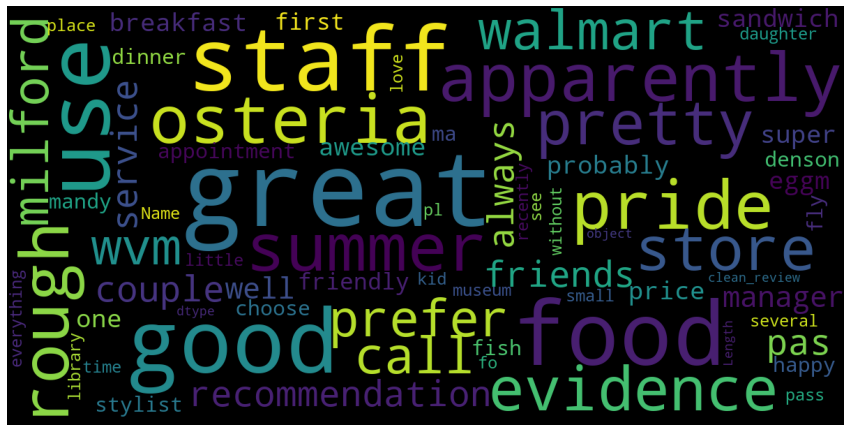

In [ ]:
# display wordcloud image graph for stars 1(positvie) 
temp_review_df = reviewDF[reviewDF['stars'] == 1]
prepare_wordcloud(temp_review_df["clean_review"])

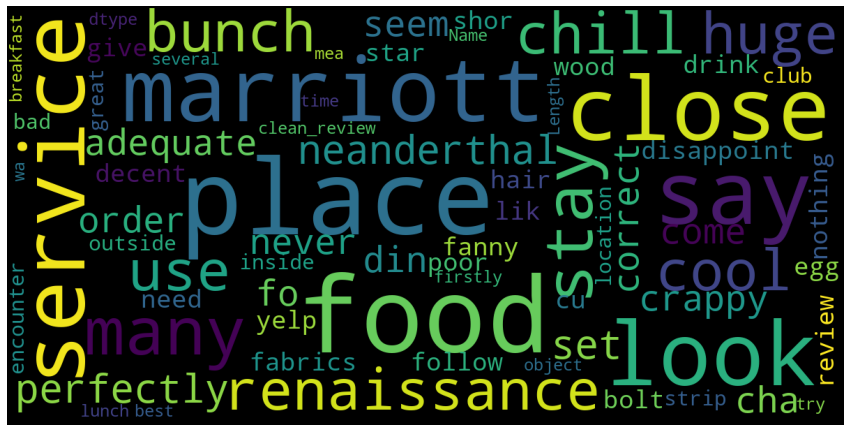

In [ ]:
# display wordcloud image graph for stars 0(Nagative) 
temp_review_df = reviewDF[reviewDF['stars'] == 0]
prepare_wordcloud(temp_review_df["clean_review"])